In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice

In [24]:
g = RandGraph(actors=10000, moving=10)

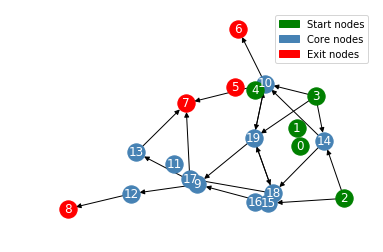

In [25]:
g.plot()

## Actions

We can control each node saturation by blocking incoming actors. Modifying `move_actors()` to pass on a list of blocked nodes.

In [26]:
g.core_nodes

[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [27]:
state = g.get_loading()

In [28]:
state

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
action = random.choices(g.core_nodes,k=3)

In [30]:
action

[18, 18, 13]

In [31]:
next_state, reward = g.action(action)

In [32]:
next_state

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
reward

0.0

### Random action

In [34]:
stored_rewards = []
stored_rewards.append(reward)
for i in range(100):
    action = random.choices(g.core_nodes, k=3)
    _, reward = g.action(action)
    stored_rewards.append(reward)
np.mean(stored_rewards)

3.3267326732673266

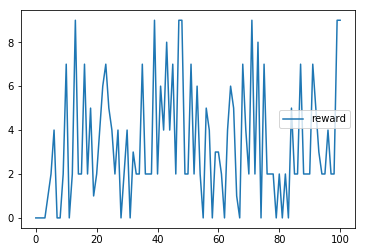

In [35]:
pd.DataFrame({'reward': stored_rewards}).plot()
plt.show()

### No action

In [36]:
stored_rewards = []
stored_rewards.append(reward)
for i in range(100):
    _, reward = g.action(None)
    stored_rewards.append(reward)
np.mean(stored_rewards)

4.00990099009901

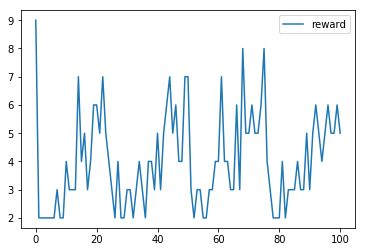

In [37]:
pd.DataFrame({'reward': stored_rewards}).plot()
plt.show()

### Always block

In [38]:
stored_rewards = []
for i in range(100):
    _, reward = g.action(g.core_nodes)
    stored_rewards.append(reward)
np.mean(stored_rewards)

0.04

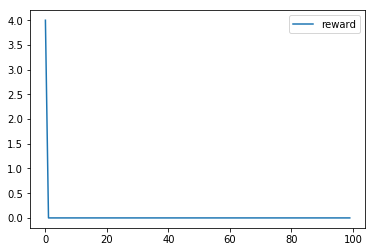

In [39]:
pd.DataFrame({'reward': stored_rewards}).plot()
plt.show()

In [40]:
stored_rewards = []
stored_rewards.append(reward)
for i in range(100):
    action = random.choices(g.core_nodes, k=3)
    _, reward = g.action(action)
    stored_rewards.append(reward)
np.mean(stored_rewards)

4.554455445544554

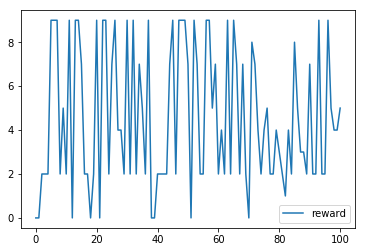

In [41]:
pd.DataFrame({'reward': stored_rewards}).plot()
plt.show()

In [42]:
g.current_reward

1196

## Evaluate random actions

In [75]:
g = RandGraph(actors=10000, moving=10)

total_rewards = {}

for i in range(len(g.core_nodes)):
    stored_rewards = []
    for j in range(100):
        action = random.choices(g.core_nodes, k=i)
        _, reward = g.action(action)
        stored_rewards.append(reward)
    total_rewards[i] = stored_rewards

In [76]:
df = pd.DataFrame(total_rewards)

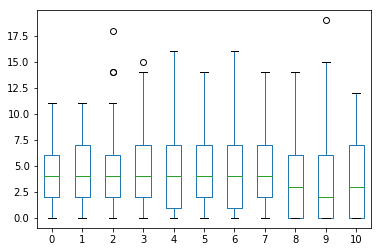

In [77]:
df.plot(kind='box')
plt.show()

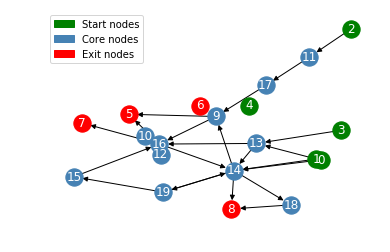

In [78]:
g.plot()